# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

# MNIST Data Download and Processing

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,Y_train) , (X_test,Y_test) = mnist.load_data()

In [5]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


# Filtering the Data (0,1,4)

In [6]:
# train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 2) | (Y_train == 3) | (Y_train == 4))
# test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 2) | (Y_test == 3) | (Y_test == 4))
train_filter = np.where((Y_train == 0 ) | (Y_train == 1) | (Y_train == 4))
test_filter = np.where((Y_test == 0) | (Y_test == 1) | (Y_test == 4))

In [7]:
X_train, Y_train = X_train[train_filter], Y_train[train_filter]
X_test, Y_test = X_test[test_filter], Y_test[test_filter]

In [8]:
# # Create a TensorFlow dataset
# dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset = dataset.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)


In [9]:
# dataset_test = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# # Define a function to resize the images
# def resize_image(image, target_size=(10, 10)):
#     resized_image = tf.image.resize(image, target_size)
#     return resized_image

# # Map the resize_image function to the dataset
# target_size = [10, 10]
# resized_dataset_test = dataset_test.map(lambda x, y: (resize_image(tf.expand_dims(x, axis=-1), target_size), y))

# # (Optional) Normalize the pixel values
# # resized_dataset = resized_dataset.map(lambda x, y: (x / 255.0, y))

# # Iterate through the resized dataset
# for image, label in resized_dataset.take(1):# Take the first 5 samples as an example
#     print("Resized Image Shape:", image.shape)
#     print("Label:", label.numpy())
#     plt.imshow(image)

In [9]:
# X_train = []
# Y_train = []
# for image , label in resized_dataset:
#     X_train.append(image)
#     Y_train.append(label.numpy())

# X_train = np.stack(X_train,axis = 0)
# Y_train = np.stack(Y_train,axis = 0)

In [10]:
# X_test = []
# Y_test = []
# for image , label in resized_dataset:
#     X_test.append(image)
#     Y_test.append(label.numpy())

# X_test = np.stack(X_test,axis = 0)
# Y_test = np.stack(Y_test,axis = 0)

# Show Random Images

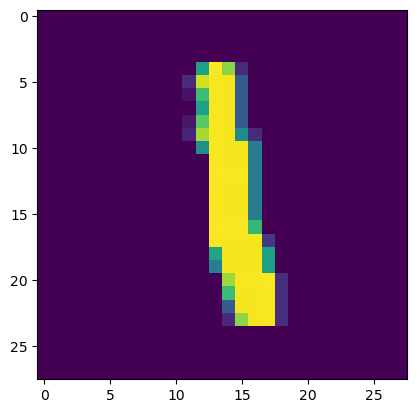

In [11]:
plt.imshow(X_train[3])

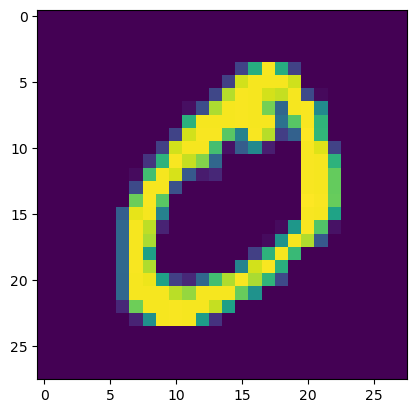

In [12]:
plt.imshow(X_train[0])

# MNIST Data Information

In [13]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (18507, 28, 28)
Y_train: (18507,)
X_test:  (3097, 28, 28)
Y_test:  (3097,)


In [10]:
from sklearn.model_selection import train_test_split

X_train, _,Y_train, _ = train_test_split(
    X_train, Y_train, train_size=500, stratify=Y_train, random_state=42
)

# Normalize the Images

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

In [393]:
train_filter_0 = np.where(Y_train == 0 )
test_filter_0 = np.where(Y_test == 0)

train_filter_1 = np.where(Y_train == 1)
test_filter_1 = np.where(Y_test == 1)

train_filter_4 = np.where(Y_train == 4)
test_filter_4 = np.where(Y_test == 4)

In [395]:
X_train_0, Y_train_0 = X_train[train_filter_0], Y_train[train_filter_0]
X_test_0, Y_test_0 = X_test[test_filter_0], Y_test[test_filter_0]

X_train_1, Y_train_1 = X_train[train_filter_1], Y_train[train_filter_1]
X_test_1, Y_test_1 = X_test[test_filter_1], Y_test[test_filter_1]

X_train_4,Y_train_4= X_train[train_filter_4], Y_train[train_filter_4]
X_test_4,Y_test_4 =X_test[test_filter_4], Y_test[test_filter_4]

In [396]:
X_train[1].shape

(28, 28)

# Flattening the Input

In [397]:
def flattenInput(mat):
        mat = mat.flatten()
        mat = mat.reshape(mat.shape[0],1)
        return mat

# Weight Initialization(Random,Normalized)

In [398]:
def weightInitialization(rows , cols, type = "random"):
    if(type == "random"):
        initialWeights = np.random.random(size = (rows,cols))
    else:
        initialWeights = np.random.normal(size = (rows,cols))
    
    initialWeights = initialWeights.reshape(rows,cols)
    return initialWeights

In [399]:
#weights = weightInitialization(784,20,"random")
weights = weightInitialization(784,10,"normalize")

In [400]:
weights.shape

(784, 10)

# Manipulating the Array

In [401]:
def manipulatingTheArray(mat):
    mat = flattenInput(mat)
    
    for index in range(mat.shape[0]):    
        if mat[index] < 0.2:
            mat[index] = -1
    return mat

# Thresholding Weight

* function   : Thesholding 
* prameters  : matrix
* return     : updated matrix
* Description : check if the value in the matrix is above or below certain thresholds.
                (e.g for the below function- if greater than 0.8 , values should remain same
                                             if between 0.5 and 0.8 , value equals 0.5
                                             if between 0.1 and 0.5 , value equals 0.3
                                             else value equals 0.1)
* 4.Points to remember : The thresholding values are hard coded. To make the code more suitable for different values ,   we can change the function parameters and pass thresholding values as well to the funtion.|

In [402]:
def Thresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.8:
            out[0][item] = 0.8
        elif out[0][item] >= 0.5 and out[0][item] < 0.8:
            out[0][item] = 0.5
        elif out[0][item] > 0.1 and out[0][item] < 0.5:
            out[0][item] = 0.3
        else:
            out[0][item] = 0.1
    return out

# Activation Value Thresholding

* This is similiar to the above funtion (thresholding function)
* Parameters  : Matrix
* Description : same as the Thresholding function. (Thresholding values are different).

In [403]:
def ActThresholding(out):
    for item in range(out.shape[1]):
        if out[0][item] >= 0.9:
            out[0][item] = 0.9
#         else:
#             out[0][item] = 0.1
    return out

# Threshold Check

* function    : crossThreshold
* parameters  : matrix
* return      : matrix
* Description : checks if the value in the matrix is greater than a certain threshold , set the value as 0 if not then do the leaking

In [404]:
def crossThreshold(out,thresholdVal,leakingVal):
   
    for item in range(out.shape[1]):
        if out[0][item] >= 0.09:
            out[0][item] = 0.09
        elif out[0][item] >=0.09 and out[0][item] <= 0.02:
            output[0][item] = 0.07
        else:
            out[0][item] = out[0][item] - leakingVal

    return out

# Weight Threshold (Future Reference)
* function    : weightThreshold
* parameters  : matrix
* return      : matrix
* Description : if the values in the matrix are less 0 , set it at 0

In [405]:
def weightThreshold(weight):
    for item in range(weight.shape[1]):
        if weight[0][item] <= 0:
            weight[0][item] = 0
    
    return weight
            

In [406]:
def weightThresholdAfterTraining(weight):
    for x in range(weight.shape[0]):
        for y in range(weight.shape[1]):
            if weight[x][y] <= 0:
                weight[x][y] = 0
    
    return weight

# Print Results
* function : printResults
* parameters : input Image matrix , weight Matrix (final)
* return : result
* Description : It does matrix dot product of the flattened image and the final weight matrix

In [407]:
# def printResults(inputImage,finalWeight):
#     result = []
#     for item in inputImage:
#         item = flattenInput(item)
#         #item = manipulatingTheArray(item)
#         result.append(np.dot(item.T,finalWeight))
#     return result

# Flattens the test Image

In [408]:
testFlatten = []

for image_ in X_test:
        image_ = flattenInput(image_)
        testFlatten.append(image_)




# Weight Update

In [409]:
def weightUpateContainingMemoryElement(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out = np.array(0)
    alpha =1e-4
    beta = 1e-5
    thresholdVal = 0.7
    leakingVal = 0.1
    outArray = []
    for epoch_ in range(epoch):
        print(epoch_)
        outEpoch = []
        for input_ in flattenImage:
                outEpoch.append(out)
                out = alpha * np.dot(input_.T , weight) + out 
                #out = ActThresholding(out)
                
                inputM = manipulatingTheArray(input_)
                weight = weight + beta * np.dot(inputM,out)
                #weight = weightThreshold(weight)
                #out = crossThreshold(out,thresholdVal,leakingVal)
        out = np.array(0)
        outArray.append(outEpoch)
    return weight,outArray

In [493]:
def weightUpateContainingMemoryElementMax(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = [] # empty list
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)
    out = np.array(0)
    alpha =1e-4
    beta = 1e-5
    thresholdVal = 0.7
    leakingVal = 0.1
    outArray = []
    for epoch_ in range(epoch):
        print(epoch_)
        outEpoch = []
        for input_ in flattenImage:
                outEpoch.append(out)
                out = alpha * np.dot(input_.T , weight) + out 
                #out = ActThresholding(out)
                maxIndex = np.argmax(out)
                #print(maxIndex)
                #print(out.shape)
                for index in range(weight.shape[0]):
                    weight[index][maxIndex] = weight[index][maxIndex] + alpha * out[0][maxIndex]
                
                
                for indexj in range(weight.shape[1]):
                    for indexi in range(weight.shape[0]):
                        if(indexj != maxIndex):
                            weight[indexi][indexj] -= alpha * out[0][indexj]
                
                for index in range(out.shape[1]):
                    if out[0][index] > 2.5:
                        out[0][index] = 0
                    elif out[0][index] < 0:
                        out[0][index] = 0
                    else:
                        out[0][index] = out[0][index] - 0.005
                        
                #out = (out - np.mean(out)) / np.std(out)
#                 inputM = manipulatingTheArray(input_)
#                 weight = weight + beta * np.dot(inputM,out)
                #weight = weightThreshold(weight)
                #out = crossThreshold(out,thresholdVal,leakingVal)
        out = np.array(0)
        outArray.append(outEpoch)
    return weight,outArray

In [494]:
# Notes
# Print the values of out and set the threshold values accordingly
# Check with different values manipulating Array, weightthreshold,crossthreshold


# Check the inputs to the threshold functions , change the threshold accordingly
# Try Normalizing the output (after the image)
# adding more hidden layers , spend time on adding layers and weight update (Mathematically), 
# Reduce the training set and check
# Try with reduce image size
# observe the outputs , spend time on that rather than just trying out different variables(Important). This will help
# you.

In [495]:
weights = weightInitialization(784,3,"random")

In [496]:
weights

array([[0.72423864, 0.9913167 , 0.45154006],
       [0.20511869, 0.00632132, 0.76026461],
       [0.22153665, 0.26482981, 0.61103223],
       ...,
       [0.96114512, 0.19196259, 0.08430765],
       [0.17837983, 0.83852247, 0.75557227],
       [0.11574117, 0.67002103, 0.90788155]])

In [497]:
finalWeight,outArray = weightUpateContainingMemoryElementMax(3,1,X_train,weights)

0
1
2


In [498]:
outArray

[[array(0),
  array([[0.00173825, 0.00152374, 0.00090613]]),
  array([[8.03017906e-04, 8.42981202e-04, 1.24973746e-05]]),
  array([[-0.00145556, -0.00136286, -0.00229874]]),
  array([[-0.00365612, -0.00353162, -0.00495417]]),
  array([[-0.00440117, -0.00416659,  0.        ]]),
  array([[ 0.        ,  0.        , -0.00125358]]),
  array([[-0.0029589 , -0.0028359 , -0.00409917]]),
  array([[-0.00280637, -0.00287853, -0.00446823]]),
  array([[-0.00221093, -0.00202294, -0.00417394]]),
  array([[-0.00227933, -0.00227587, -0.00468161]]),
  array([[0., 0., 0.]]),
  array([[-0.00155947, -0.00142863, -0.00120105]]),
  array([[-0.00441997, -0.00446131, -0.00410955]]),
  array([[0., 0., 0.]]),
  array([[0.00316427, 0.00329285, 0.00272832]]),
  array([[0.00333217, 0.00351148, 0.00265476]]),
  array([[0.00427679, 0.00469258, 0.00371389]]),
  array([[0.00211753, 0.00272908, 0.00142836]]),
  array([[ 0.00033772,  0.0010379 , -0.00034311]]),
  array([[-0.00068068,  0.0003166 , -0.00163951]]),
  array(

In [499]:
# Printing the output----> the output is increasing in absolute value.(If the starting value is negative then in 
#negative direction or postive then in positive direction)

In [500]:
# To Do---

# Why the output is negative    -----> normalize set some of the weight negative that's why  -->Done
# Normalize the output --> Check the result.   ------> increased the accuracy to ~ 70   -->Done
# Find the outputs for individual digits(0,1,4) and check their values


# try to find the threshold for all output neurons and see
# instead of average , get the max value


In [501]:
finalWeight

array([[0.72348704, 0.99248499, 0.45077281],
       [0.20436709, 0.00748961, 0.75949736],
       [0.22078505, 0.26599809, 0.61026498],
       ...,
       [0.96039352, 0.19313088, 0.0835404 ],
       [0.17762823, 0.83969075, 0.75480502],
       [0.11498957, 0.67118931, 0.9071143 ]])

In [502]:
finalWeight = weightThresholdAfterTraining(finalWeight)

In [503]:
finalWeight

array([[0.72348704, 0.99248499, 0.45077281],
       [0.20436709, 0.00748961, 0.75949736],
       [0.22078505, 0.26599809, 0.61026498],
       ...,
       [0.96039352, 0.19313088, 0.0835404 ],
       [0.17762823, 0.83969075, 0.75480502],
       [0.11498957, 0.67118931, 0.9071143 ]])

In [504]:
outArray[2]

[array(0),
 array([[0.00173163, 0.00153407, 0.00089935]]),
 array([[7.92085276e-04, 8.60029411e-04, 1.29811562e-06]]),
 array([[-0.00146936, -0.00134134, -0.00231288]]),
 array([[-0.0036727 , -0.00350576, -0.00497116]]),
 array([[-0.00442231, -0.00413363,  0.        ]]),
 array([[ 0.        ,  0.        , -0.00125757]]),
 array([[-0.00296115, -0.00283239, -0.00410547]]),
 array([[-0.00281356, -0.00286732, -0.00447959]]),
 array([[-0.00222392, -0.00200268, -0.00419124]]),
 array([[-0.00229712, -0.00224814, -0.00470382]]),
 array([[0., 0., 0.]]),
 array([[-0.00156325, -0.00142273, -0.00120493]]),
 array([[-0.00442596, -0.00445198, -0.00411568]]),
 array([[0., 0., 0.]]),
 array([[0.00315617, 0.00330548, 0.00272003]]),
 array([[0.00331888, 0.00353221, 0.00264114]]),
 array([[0.00425745, 0.00472274, 0.00369408]]),
 array([[0.00209532, 0.00276372, 0.0014056 ]]),
 array([[ 0.00031198,  0.00107804, -0.00036947]]),
 array([[-0.00071067,  0.00036336, -0.00167022]]),
 array([[-0.00220189, -0.0008

In [505]:
# Make sure the weights positve greater than 0
# (-1,1) reference 
# weight range (0,1) ---> 1st check and try to make sure it stays between these values.
# if it does not happen , then go for (-1,1) before that check the thresholding functions and out

# try getting above 95 percentage.

# if not possible , try adding hidden layers and check


# Normalize the outputs and check the variations of the values and the image
# How the output neurons are varying with each other


# 784 , 700 , 500 , 100 and check the outputs and these are output neurons
# take the weights in the range -1 to 1 and change the threshold values accordingly.
# This is local learning , can't use info from one layer to another layer
# After all this try having different threshold for each of the output neurons and see. 


In [506]:
def printResults(inputImage,finalWeight):
    result = []
    for item in inputImage:
        item = flattenInput(item)
        #item = manipulatingTheArray(item)
        result.append(np.dot(item.T,finalWeight))
    return result

In [507]:
results=printResults(X_train,finalWeight)

In [508]:
results

[array([[67.2842503 , 65.39014362, 58.96102325]]),
 array([[40.58374933, 43.29192635, 40.99837118]]),
 array([[27.37175144, 28.00779692, 26.84419682]]),
 array([[27.95319296, 28.37655617, 23.4036574 ]]),
 array([[42.48191517, 43.75531847, 45.94718908]]),
 array([[35.57260714, 35.821945  , 37.40528716]]),
 array([[20.37768866, 21.69296946, 21.51000671]]),
 array([[51.45213317, 49.68746758, 46.23469101]]),
 array([[55.86838113, 58.68964175, 52.85516869]]),
 array([[49.24483409, 47.58123191, 44.85077543]]),
 array([[22.12593768, 21.79193863, 20.6811957 ]]),
 array([[34.34931113, 35.8009537 , 37.93220781]]),
 array([[21.3624684 , 19.72387627, 20.88173033]]),
 array([[18.06365723, 21.35327436, 22.09342136]]),
 array([[81.52262483, 83.11516826, 77.16065106]]),
 array([[51.60216561, 52.30601325, 49.18579391]]),
 array([[59.35680211, 61.95012018, 60.49998563]]),
 array([[28.36489241, 30.43109735, 27.10125941]]),
 array([[32.14991157, 33.16920484, 32.23227172]]),
 array([[39.7533538 , 42.884527

In [463]:
print(np.argmax(results[0]))

1


* calculating average value from result matrix.

In [464]:
resultsAvg = []
for item in range(len(results)):
    resultsAvg.append(np.median(results[item]))

In [465]:
np.unique(Y_train)

array([0, 1, 4], dtype=uint8)

* Storing the indices of the image in y_train corresponding to 0,1,2,3,4

In [466]:
res0 = []
res1 = []
res4 = []

index = 0

for item in Y_train: 
    if item == 0:
        res0.append(index)
    elif item == 1:
        res1.append(index)
    elif item == 4:
        res4.append(index)
    index += 1
        

# Checking the values of Zeros

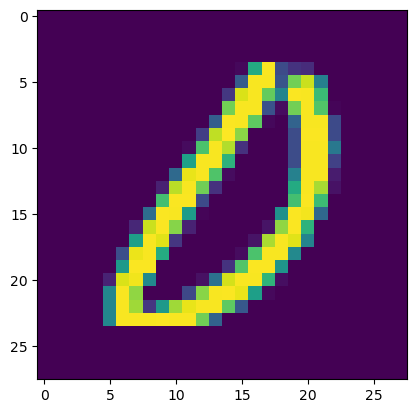

In [467]:
plt.imshow(X_train[res0[0]])

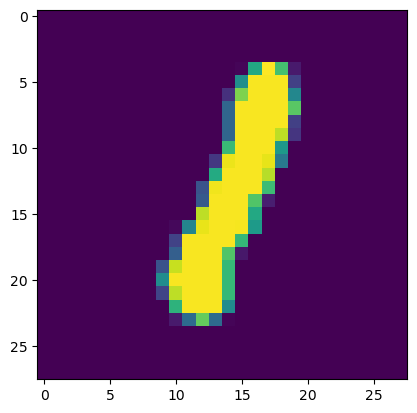

In [468]:
plt.imshow(X_train[res1[0]])

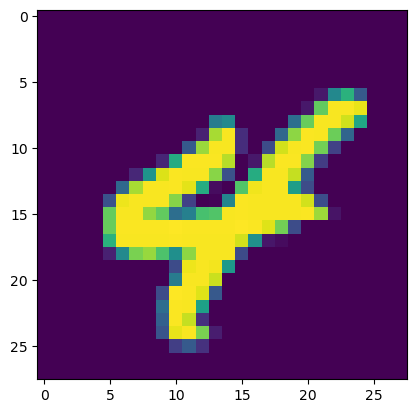

In [469]:
plt.imshow(X_train[res4[0]])

# Storing the index of the images

* function : storingIndexes
* parameters : passing list containing indices of the image 0,1,2,3,4
* return : values corresponding to those indices(image)

In [470]:

def storingIndexes(res0,res1,res4):
    result0 = []
    result1 = []
    result4 = []
    
    for index in res0:
        result0.append(resultsAvg[index])
    
    for index in res1:
        result1.append(resultsAvg[index])
        
    for index in res4:
        result4.append(resultsAvg[index])
    
    return result0,result1,result4
        

In [471]:
result0 , result1 , result4 =storingIndexes(res0,res1,res4)

In [472]:
def plotResults(res):
    plt.plot(res)
    plt.ylim(0,1)
    plt.show()

In [473]:
#plotResults(result0)

(array([1., 0., 1., 0., 3., 1., 1., 2., 1., 2., 5., 4., 3., 6., 6., 6., 2.,
        5., 9., 3., 7., 7., 5., 8., 8., 5., 6., 6., 3., 5., 4., 8., 2., 2.,
        4., 1., 1., 5., 0., 2., 3., 0., 1., 3., 0., 0., 0., 0., 1., 2.]),
 array([ 23.1961428 ,  25.16161644,  27.12709008,  29.09256372,
         31.05803736,  33.023511  ,  34.98898464,  36.95445828,
         38.91993192,  40.88540556,  42.8508792 ,  44.81635284,
         46.78182648,  48.74730012,  50.71277376,  52.6782474 ,
         54.64372104,  56.60919468,  58.57466832,  60.54014196,
         62.5056156 ,  64.47108924,  66.43656288,  68.40203652,
         70.36751016,  72.3329838 ,  74.29845744,  76.26393108,
         78.22940472,  80.19487836,  82.160352  ,  84.12582564,
         86.09129928,  88.05677292,  90.02224656,  91.9877202 ,
         93.95319384,  95.91866748,  97.88414112,  99.84961476,
        101.8150884 , 103.78056204, 105.74603568, 107.71150932,
        109.67698296, 111.6424566 , 113.60793024, 115.57340388,
      

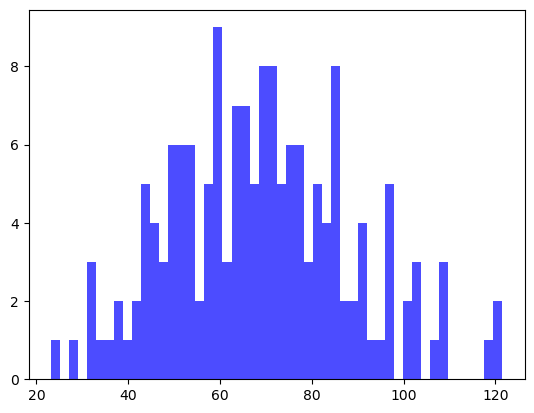

In [474]:
plt.hist(result0, bins=50, color='blue', alpha=0.7) 

In [475]:
#plotResults(result1)

(array([ 1.,  3.,  0.,  0.,  2.,  1.,  4., 10.,  9.,  6., 12.,  6.,  9.,
         9., 11.,  6.,  7.,  4.,  7.,  9., 10.,  1.,  9.,  8., 11.,  4.,
         4.,  2.,  3.,  2.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([11.52611488, 12.49430701, 13.46249915, 14.43069128, 15.39888341,
        16.36707555, 17.33526768, 18.30345982, 19.27165195, 20.23984409,
        21.20803622, 22.17622836, 23.14442049, 24.11261262, 25.08080476,
        26.04899689, 27.01718903, 27.98538116, 28.9535733 , 29.92176543,
        30.88995757, 31.8581497 , 32.82634183, 33.79453397, 34.7627261 ,
        35.73091824, 36.69911037, 37.66730251, 38.63549464, 39.60368678,
        40.57187891, 41.54007104, 42.50826318, 43.47645531, 44.44464745,
        45.41283958, 46.38103172, 47.34922385, 48.31741599, 49.28560812,
        50.25380025, 51.22199239, 52.19018452, 53.15837666, 54.12656879,
        55.09476093, 56.06295306, 57.03114519, 57.99933733,

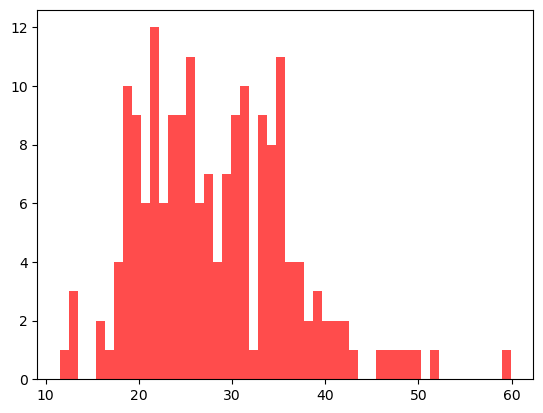

In [476]:
plt.hist(result1, bins=50, color='red', alpha=0.7) 

In [477]:
#plotResults(result4)

(array([3., 0., 1., 2., 1., 4., 2., 1., 5., 3., 6., 8., 9., 9., 9., 4., 6.,
        8., 8., 2., 8., 6., 4., 5., 1., 8., 3., 2., 5., 4., 4., 5., 2., 1.,
        1., 1., 1., 2., 2., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([22.23892476, 23.55099578, 24.86306681, 26.17513784, 27.48720887,
        28.7992799 , 30.11135093, 31.42342196, 32.73549299, 34.04756402,
        35.35963505, 36.67170608, 37.98377711, 39.29584814, 40.60791917,
        41.9199902 , 43.23206123, 44.54413226, 45.85620329, 47.16827432,
        48.48034534, 49.79241637, 51.1044874 , 52.41655843, 53.72862946,
        55.04070049, 56.35277152, 57.66484255, 58.97691358, 60.28898461,
        61.60105564, 62.91312667, 64.2251977 , 65.53726873, 66.84933976,
        68.16141079, 69.47348182, 70.78555285, 72.09762388, 73.4096949 ,
        74.72176593, 76.03383696, 77.34590799, 78.65797902, 79.97005005,
        81.28212108, 82.59419211, 83.90626314, 85.21833417, 86.5304052 ,
        87.84247623]),
 <BarContainer object

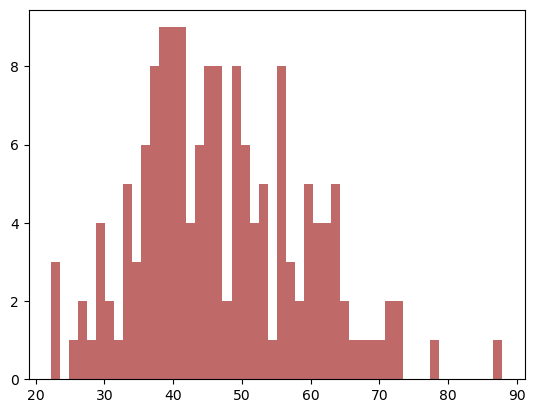

In [478]:
plt.hist(result4, bins=50, color='brown', alpha=0.7) 

In [479]:
def calculateResult(data,finalWeight):
        predict = []
        for item in data:
            item = flattenInput(item)
            res = np.dot(item.T,finalWeight)
            res = np.median(res)
            predict.append(res)
        return predict

In [480]:
from scipy.stats import norm

In [481]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = 0
    accuracy = 0
    for true, predicted in zip(y_true, y_pred):
        if true == predicted:
            correct_predictions += 1
            accuracy = correct_predictions/len(y_true)
    return accuracy*100

In [482]:
# Calculate the probability densities under each distribution
result = calculateResult(X_test,finalWeight)
prediction = []
for value in result:
    pdf1 = norm.pdf(value, loc=np.mean(result0), scale=np.std(result0))
    pdf2 = norm.pdf(value, loc=np.mean(result1), scale=np.std(result1))
    pdf3 = norm.pdf(value, loc=np.mean(result4), scale=np.std(result4))

# Determine which distribution the value most likely belongs to
    if pdf1 > pdf2 and pdf1 > pdf3:
        prediction.append(0)
    elif pdf2 > pdf1 and pdf2 > pdf3:
        prediction.append(1)
    else:
        prediction.append(4)

In [483]:
accuracy = compute_accuracy(Y_test,prediction)

In [484]:

accuracy

70.42298999031321

In [386]:
#*************************************************
# random ---> median ---> 69.8 ----> 3
# normalize ----> median ---> 44.04 ---->3
# random ---> mean ---> 69.7 -----> 3
# normalize ---> median ---> 63.254 --->10
# random -----> median ----> 68.2 ----> 10

# Above observation for output neuon equals 20
#*************************************************
# random -----> median ----> 67.06 ----> 10
# random -----> mean -----> 65.87 ---->10
# normalize ---> mean -----> 55.92 ----> 10
# normalize --->median -----> 48.01 ---->10

# Above observation for output neuon equals 3
#*************************************************
# normalize ----> median -----> 76.5 ----> 10 --> 1st time
# normalize ----> median -----> 71.68 ----> 10 --> 2nd Time
#*************************************************
# normalize ----> median ----->69.03 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking)
# normalize ----> median ----->68.4 ----> 10 ----->weightThresholding after epoch ---> 0.9(Threshold),0.1(Leaking), removed out threshold

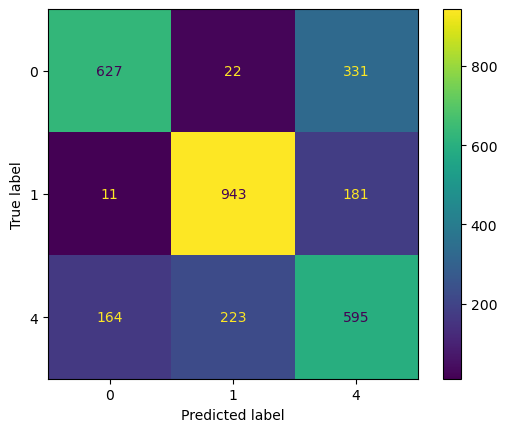

In [387]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(Y_test,prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1 ,4])

cm_display.plot()
plt.show()

In [295]:
np.min(result0)

25.849895846660047

In [229]:
np.max(result0)

9069.743417341037

* Returns min and max value in a list

In [230]:
def MaxMinResult(res):
    return np.min(res) , np.max(res)

In [233]:
min0 , max0 = MaxMinResult(result0)
min1 , max1 = MaxMinResult(result1)
min4 , max4 = MaxMinResult(result4)

In [234]:
print(min0)
print(max0)

820.6168923161749
9069.743417341037


In [235]:
print(min1)
print(max1)

124.88702314462651
4035.114572155578


In [236]:
print(min4)
print(max4)

358.7676893895287
7342.2584121915625


In [237]:
max_value = np.max(result0)
index = result0.index(max_value)
print(index)


4077


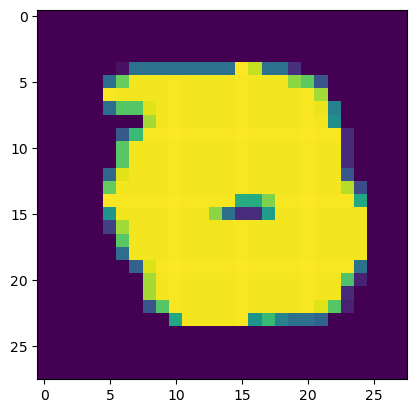

In [238]:
plt.imshow(X_train[res0[4077]])

In [239]:
max_value = np.min(result0)
index = result0.index(max_value)
print(index)


3707


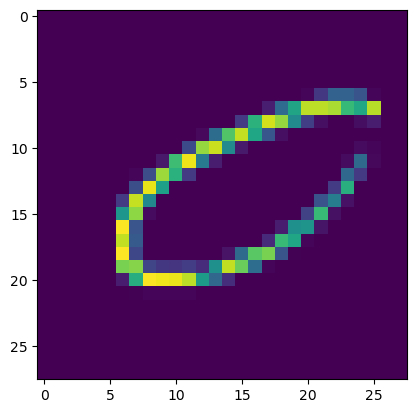

In [240]:
plt.imshow(X_train[res0[3525]])

In [241]:
np.mean(np.dot(testFlatten[0].T,finalWeight))

300.2028669737775

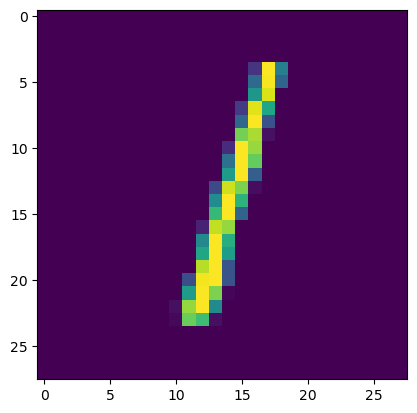

In [242]:
plt.imshow(X_test[0])

In [243]:
np.mean(np.dot(testFlatten[3].T,finalWeight))

420.13239328502254

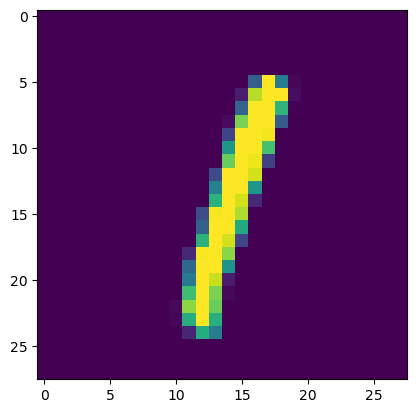

In [244]:
plt.imshow(X_test[3])

# Problem

1. Proper Encoding of the MNIST Data is required
2. Check the algorithm for previous data
    - The weight values are increasing
3. Thresholding on weights
4. If weights are increasing then the output will be increasing , we have to work on the the weight clipping.
5. Epochs 10
6. Digits 0-5 (20 output neurons)

In [245]:
def weightUpdate(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                input_ = manipulatingTheArray(input_)
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    #manipulatedinput = manipulatingTheArray(input_)
                    weight = weight + np.dot(input_, out)
                print(out)
            

In [246]:
weightUpdate(1,1,X_train,weights)

NameError: name 'thresholding' is not defined

# Experimenting with the Weight Update Function 

1. Without Thresholding

In [77]:
def weightUpdateNoThresholding(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    mInput = manipulatingTheArray(input_)
                    weight = weight + np.dot(mInput, out)
                print(out)
    
    #return weight

In [80]:
#weightUpdateNoThresholding(1,10,X_train,weights)

2. No Input Manipulation

In [81]:
def weightUpdateNoInputManipulation(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
            for input_ in flattenImage:
                for iteration_ in range(iteration):
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [83]:
finalWeights = weightUpdateNoInputManipulation(1,10,X_train,weights)

In [85]:
printResults(X_train,finalWeights)

[array([[9952981.9776312 , 9952983.78771774, 9952980.22546172,
         9952984.17954997, 9952979.62129831, 9952983.39618329,
         9952984.12277677, 9952978.30823085, 9952977.73184416,
         9952980.29404787, 9952981.81693666, 9952978.96837344,
         9952982.51001832, 9952984.30400523, 9952986.40933317,
         9952980.39956972, 9952981.34806903, 9952978.70548629,
         9952983.84226781, 9952980.82762274]]),
 array([[4411007.2184424 , 4411010.05153546, 4411008.07675292,
         4411007.48091497, 4411005.18366287, 4411007.69902311,
         4411008.45580176, 4411005.91641389, 4411009.47492531,
         4411012.58481127, 4411007.2804175 , 4411008.07541623,
         4411008.01839292, 4411010.98324115, 4411010.77982822,
         4411009.52036677, 4411013.13197226, 4411008.80886294,
         4411007.73641599, 4411004.83176408]]),
 array([[6388741.87790482, 6388748.81913613, 6388745.38822244,
         6388746.8537067 , 6388741.0350559 , 6388747.00410496,
         6388742.58585

3. Do combined Iteration for every image

In [86]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [88]:
finalWeights = weightUpdateCombinedIterationForEveryImage(1,100,X_train,weights)

In [90]:
printResults(X_train,finalWeights)

[array([[99529267.36481458, 99529269.17490125, 99529265.61264522,
         99529269.56673346, 99529265.00848174, 99529268.78336686,
         99529269.50996026, 99529263.69541438, 99529263.11902767,
         99529265.68123133, 99529267.2041201 , 99529264.35555698,
         99529267.89720179, 99529269.69118871, 99529271.79651667,
         99529265.7867532 , 99529266.73525254, 99529264.09266976,
         99529269.22945133, 99529266.21480618]]),
 array([[44109744.56282634, 44109747.39591942, 44109745.4211369 ,
         44109744.82529893, 44109742.52804684, 44109745.04340708,
         44109745.80018574, 44109743.26079787, 44109746.81930929,
         44109749.92919523, 44109744.62480146, 44109745.41980021,
         44109745.36277688, 44109748.3276251 , 44109748.12421215,
         44109746.86475074, 44109750.4763562 , 44109746.15324692,
         44109745.08079994, 44109742.17614804]]),
 array([[63887140.69885273, 63887147.64008407, 63887144.20917038,
         63887145.67465465, 63887139.85600

4. Changing the input to 0 to -1

In [91]:
def weightUpdateCombinedIterationForEveryImage(epoch,iteration,inputImage,weight):
    """
    Every epoch , We are doing iterations for every image in 
    the list
    """
    flattenImage = []
    for image_ in inputImage:
        image_ = flattenInput(image_)
        flattenImage.append(image_)

    for epoch_ in range(epoch):
        for iteration_ in range(iteration):
            for input_ in flattenImage:
                    input_ = manipulatingTheArray(input_)
                    out = np.dot(input_.T , weight)
                    out = thresholding(out)
                    weight = weight + np.dot(input_, out)

    return weight

In [92]:
finalWeight = weightUpdateCombinedIterationForEveryImage(3,10,X_train,weights)

In [62]:
for item in inputImage:
    item = flattenInput(item)
    item = manipulatingTheArray(item)
    print(np.dot(item.T,finalWeight))

[[-144.11405281 -136.28787408 -142.12877323 -141.81974185]]
[[221.36048886 220.38450421 221.04038429 221.29584165]]
[[304.967655   293.81240137 304.12401618 303.73500904]]
[[250.65550314 240.63892014 251.23764588 250.69424831]]


In [57]:
finalWeight

array([[ 69.39000612,  68.04254974,  69.43624434,  69.21410972],
       [ 27.32086988,  27.73503806,  27.14569411,  27.62237861],
       [ 69.59175721,  67.63236573,  69.84716618,  69.13499989],
       [-26.91268329, -26.00519731, -26.88039291, -26.61352704],
       [ 27.07747724,  27.15349475,  27.58290186,  27.71552529],
       [ 21.88294213,  19.82698269,  21.19890101,  21.59518935],
       [-26.19324792, -25.02202828, -26.97153446, -26.72172794],
       [-20.80487026, -19.01843236, -20.95428235, -20.61819169],
       [ 69.94875543,  67.68330195,  69.2727027 ,  69.93041008]])